# Install packages

First thing is to install pandas, numpy, scikit-learn, matplotlib, and seaborn. Then below you see where we import the packages in our notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc





from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, plot_confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Import the data and start exploring it

In [2]:

data = pd.read_csv('../Project Retain Alabama/Survey Data and Info/UABformatChange.csv')
alabamaData = pd.read_csv('../Project Retain Alabama/Survey Data and Info/alabamaData.csv')
alabamaData.head()

,University,GradTime,FTPT,Distance,Full,STEM,Alcareerlearn,StayAL,AL Resident,StateHS,...,AL Resident.1,StateHS.1,StateHScode.1,ALHS.1,Gender.1,Race.1,Race Code.1,Age.1,Disability.1,FirstGEn.1
0,1,2021,Full-time Distance Education,1,1,1,1,0,1,Alabama,...,1.0,Alabama,9,3.0,1,Black or African American,2,2,0.0,1.0
1,1,2021,Full-time Distance Education,1,1,1,1,1,1,Alabama,...,1.0,Alabama,9,13.0,1,Black or African American,2,3,0.0,1.0
2,1,2021,Full-time Distance Education,1,1,1,1,1,1,Alabama,...,1.0,Alabama,9,15.0,1,Black or African American,2,2,0.0,1.0
3,1,2022,Full-time Distance Education,1,1,1,1,3,1,Alabama,...,1.0,Alabama,9,8.0,1,Black or African American,2,2,0.0,0.0
4,1,2023,Full-time Distance Education,1,1,1,1,3,1,Alabama,...,1.0,Alabama,9,10.0,1,Black or African American,2,2,0.0,0.0


Some commands you could start with : 
- data.describe()
- data.shape
- data.isnull().sum()
- data['column name'].value_counts()

# Transform the Data for Regression

In [ ]:
data = data.replace(np.NAN, 0)
alabamaData = alabamaData.replace(np.NAN, 0)
data = data.loc[:,~data.columns.duplicated()]
alabamaData = alabamaData.loc[:,~alabamaData.columns.duplicated()]

In [3]:
# Use get dummies for one hot encoding 
# pd.get_dummies(data.University, prefix='University Code')
# readData = pd.get_dummies(data, columns=['Race','StateHS','Major','Major Code', 'Major Code Revised'])
readAlabamaData = pd.get_dummies(alabamaData, columns=['Race','StateHS','Major','Major Code', 'Major Code Revised'])

# readData
readAlabamaData.describe()
# data = pd.concat([data, rd], axis=1)
# data
# print(data)

,University,GradTime,Distance,Full,STEM,Alcareerlearn,StayAL,AL Resident,StateHScode,ALHS,...,"Major Code_Other, Social Sciences","Major Code_Science, Technology, Engineering and Mathematics","Major Code_Transportation, Distribution and Logistics","Major Code Revised_Arts, A/V Technology and Communications",Major Code Revised_Business Management and Administration,Major Code Revised_Education and Training,Major Code Revised_Health Sciences,Major Code Revised_Human Services,"Major Code Revised_Law, Public Safety, Public Administration","Major Code Revised_Science, Technology, Engineering and Mathematics"
count,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,7855.000000,...,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,7.992446,2021.986111,0.316155,0.875975,0.306043,0.725268,1.630361,0.642544,7.299464,36.898027,...,0.009259,0.224415,0.009990,0.076633,0.187135,0.144737,0.145833,0.126096,0.048002,0.271564
std,3.226881,0.831072,0.465003,0.329631,0.460876,0.446406,1.250832,0.479280,2.649684,43.085221,...,0.095784,0.417222,0.099457,0.266024,0.390043,0.351857,0.352961,0.331978,0.213783,0.444793
min,1.000000,2021.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2021.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2022.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,9.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,9.000000,99.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,14.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,10.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# readData['StayAL'].value_counts()
alabamaData['StayAL'].value_counts()

3    539
1    383
0    284
Name: StayAL, dtype: int64

3    3546
1    2744
0    1918
Name: StayAL, dtype: int64

In [ ]:
# A useful function for changing strings 
# for i in list(data.columns):
#     data[i] = data[i].apply(lambda x: str(x)).apply(lambda x: x.replace('|' , ','))
# data = data[~data.columns.duplicated()]
alabamaData.describe()

,University,GradTime,Distance,Full,STEM,Alcareerlearn,StayAL,AL Resident,StateHScode,ALHS,Gender,Race Code,Age,Disability,FirstGEn,Rcurric,Rk-12,Rprof,Rfamily,Rfriend,Rmedia,Rextra,Rindustry,Rhighscho,Rcollege,Rprospect,Rjob,Rother,ExploreAL,Eaubrun,Efoley,Ebham,Edemop,Edothan,Eflor,Epayne,Egadsden,Egulf,Ehunts,Emobile,Emontg,Eselma,Etrpy,Etuscal,Eother,ENA,Positive1,Positive2,Positive3,Allive,Alwork,Aloverall,Alfriendly,Aldiverse,Alfaith,Alnature,Alweather,Alsafety,Aljob,Alsalary,Albenefits,Aladvance,Alcostliving,Aleducation,Alpolitical,Alsocial,Alfamily,Aldining,Alevents,Alsporting,Aloutdoor,Ioverall,Ifriendly,Idiverse,Ifaith,Inature,Iweather,Isafety,Ijob,Isalary,Ibenefits,Iadvance,Icostlive,Ieducation,Ipolitical,Isocial,Ifamily,Idining,Ievents,Isporting,Ioutdoor,AL_c_live,A_c_lwork,Al_c_overall,Al_c_friendly,Al_c_diverse,Al_c_faith,Al_c_nature,Al_c_weather,Al_c_safety,Al_c_job,Al_c_salary,Al_c_benefits,Al_c_advance,Al_c_costliving,Al_c_education,Al_c_political,Al_c_social,Al_c_family,Al_c_dining,Al_c_events,Al_c_sporting,Al_c_outdoor,I_c_overall,I_c_friendly,I_c_diverse,I_c_faith,I_c_nature,I_c_weather,I_c_safety,I_c_job,I_c_salary,I_c_benefits,I_c_advance,I_c_costlive,I_c_education,I_c_political,I_c_social,I_c_family,I_c_dining,I_c_events,I_c_sporting,I_c_outdoor,AL Resident.1,StateHScode.1,ALHS.1,Gender.1,Race Code.1,Age.1,Disability.1,FirstGEn.1
count,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.0,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.00000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.00000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.00000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.00000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000,8208.000000
mean,7.992446,2021.986111,0.316155,0.875975,0.306043,0.725268,1.630361,0.642544,7.299464,35.311160,1.337110,3.498294,2.486964,0.051291,0.382188,0.543616,0.168616,0.119152,0.301413,0.160819,0.153752,0.151925,0.066155,0.130482,0.130117,0.354167,0.093080,0.191886,0.881701,0.501218,0.286672,0.790448,0.100634,0.249147,0.248782,0.217471,0.334917,0.538499,0.550317,0.404605,0.489157,0.152412,0.273879,0.518640,0.0,0.092349,8.691033,9.689571,11.155214,3.626584,3.513767,3.187987,3.977948,2.985624,3.920931,4.125244,3.728801,3.451145,3.380848,2.977339,3.248538,3.306287,3.983065,3.905945,2.842714,2.957237,3.833699,3.667276,3.249391,3.818957,4.044347,3.759990,4.186160,4.227461,3.870858,4.145833,4.032895,4.324440,4.527778,4.409113,4.312378,4.410697,4.41691,4.030945,3.804703,3.917641,3.817861,3.740375,3.70346,3.315911,4.117690,3.904727,3.769250,3.274366,4.366715,3.013645,4.194932,4.537524,4.092105,3.704922,3.598441,2.983187,3.407407,3.49512

In [ ]:
# renaming columns
pd.options.display.max_columns = 300
pd.options.display.max_rows = 10
# readData
readAlabamaData
# data = data.rename(columns = {'_Virginia': 'Virginia'})
# data
# Regressiona
readAlabamaData.columns.get_loc("Major_Agricultural/ Animal Sciences")

,University,GradTime,FTPT,Distance,Full,STEM,Alcareerlearn,StayAL,AL Resident,StateHScode,ALHS,Gender,Race Code,Age,Disability,FirstGEn,Rcurric,Rk-12,Rprof,Rfamily,Rfriend,Rmedia,Rextra,Rindustry,Rhighscho,Rcollege,Rprospect,Rjob,Rother,ExploreAL,Eaubrun,Efoley,Ebham,Edemop,Edothan,Eflor,Epayne,Egadsden,Egulf,Ehunts,Emobile,Emontg,Eselma,Etrpy,Etuscal,Eother,ENA,Positive1,Positive2,Positive3,Allive,Alwork,Aloverall,Alfriendly,Aldiverse,Alfaith,Alnature,Alweather,Alsafety,Aljob,Alsalary,Albenefits,Aladvance,Alcostliving,Aleducation,Alpolitical,Alsocial,Alfamily,Aldining,Alevents,Alsporting,Aloutdoor,Ioverall,Ifriendly,Idiverse,Ifaith,Inature,Iweather,Isafety,Ijob,Isalary,Ibenefits,Iadvance,Icostlive,Ieducation,Ipolitical,Isocial,Ifamily,Idining,Ievents,Isporting,Ioutdoor,AL_c_live,A_c_lwork,Al_c_overall,Al_c_friendly,Al_c_diverse,Al_c_faith,Al_c_nature,Al_c_weather,Al_c_safety,Al_c_job,Al_c_salary,Al_c_benefits,Al_c_advance,Al_c_costliving,Al_c_education,Al_c_political,Al_c_social,Al_c_family,Al_c_dining,Al_c_events,Al_c_sporting,Al_c_outdoor,I_c_overall,I_c_friendly,I_c_diverse,I_c_faith,I_c_nature,I_c_weather,I_c_safety,I_c_job,I_c_salary,I_c_benefits,I_c_advance,I_c_costlive,I_c_education,I_c_political,I_c_social,I_c_family,I_c_dining,I_c_events,I_c_sporting,I_c_outdoor,AL Resident.1,StateHS.1,StateHScode.1,ALHS.1,Gender.1,Race.1,Race Code.1,Age.1,Disability.1,FirstGEn.1,Race_American Indian or Alaska Native,Race_Asian,Race_Black or African American,Race_Hispanic or Latino,Race_Native Hawaiian or Other Pacific Islander,Race_Other or Unknown,...,StateHS_Outside of the U.S.,StateHS_Pennsylvania,StateHS_Puerto Rico,StateHS_Rhode Island,StateHS_South Carolina,StateHS_South Dakota,StateHS_Tennessee,StateHS_Texas,StateHS_Utah,StateHS_Vermont,StateHS_Virginia,StateHS_Washington,StateHS_West Virginia,StateHS_Wisconsin,StateHS_Wyoming,Major_Agricultural/ Animal Sciences,"Major_Architecture, Community Planning and Design","Major_Arts, Visual and Performing","Major_Aviation Management, Professional Flight","Major_Biological Sciences, Biochemistry/ Molecular Biology","Major_Biological Sciences, Biomedical Sciences","Major_Biological Sciences, Cell Biology/ Microbiology/ Immunology","Major_Biological Sciences, General","Major_Biological Sciences, Genetics/ Genomics","Major_Biological Sciences, Marine Biology","Major_Biological Sciences, Neuroscience/ Neurobiology","Major_Biological Sciences, Other","Major_Biological Sciences, Pathology/ Toxicology",Major_Business Administration/ Management,"Major_Business, Accounting","Major_Business, Economics","Major_Business, Entrepreneurship","Major_Business, Finance/ Banking","Major_Business, Human Resources","Major_Business, International","Major_Business, Logistics/ Supply Chain","Major_Business, Management Information Systems","Major_Business, Management Science/ Analytics","Major_Business, Marketing","Major_Business, Other","Major_Business, Technology Management","Major_Communications, Journalism, Media","Major_Criminal Justice, Emergency Mgmt, Homeland Security","Major_Cultural Studies, African American Studies, Women's Studies","Major_Education, Art","Major_Education, Career/ Technical","Major_Education, Counseling","Major_Education, Early Childhood","Major_Education, Elementary","Major_Education, Grades 6-12 English Language Arts","Major_Education, Grades 6-12 Foreign Language","Major_Education, Grades 6-12 Mathematics","Major_Education, Grades 6-12 Science","Major_Education, Grades 6-12 Social Science","Major_Education, Instructional Technology/ Media","Major_Education, Leadership/ Administration","Major_Education, Music","Major_Education, Other","Major_Education, Physical and Health","Major_Education, Special Education",Major_Engineering Technology,"Major_Engineering, Aerospace","Major_Engineering, Architectural/ Construction","Major_Engineering, Biomedical/ Medical","Major_Engineering, Chemical","Major_Engineering, Civil","Major_Engineering, Computer/ Software","Major_Engineering, Electric

205

In [ ]:
readAlabamaData = readAlabamaData[readAlabamaData.StayAL != 3]
# x = readAlabamaData[["Distance","Full","STEM","Gender", 'Major_IT, Computer Science']]
x = readAlabamaData.drop(['GradTime', 'FTPT', 'StateHS.1', 'Race.1', 'StayAL'], axis='columns')
# x = readAlabamaData.iloc[:, 205:]
y = readAlabamaData['StayAL']


In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

# x = readAlabamaData.drop(['University','GradTime', 'FTPT','StateHS.1','Race.1'], axis='columns')

print('The classification data')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# logReg = LogisticRegression(penalty='l1' ,solver='liblinear', C=10)
# model = logReg.fit(X_train,y_train)
# model.classes_0



The classification data


In [ ]:
logreg = LogisticRegression()
parameters = {'penalty':['l2', 'l1'], 'C':[.0001, .01, 1, 10, 100],
'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
lr_random = RandomizedSearchCV(estimator = logreg, param_distributions = parameters,
n_iter = 40, cv = 5,
random_state=42, n_jobs = -1)

model = lr_random.fit(X_train, y_train)
print("Best score: ", lr_random.best_score_)
print("Best parameters: ", lr_random.best_params_)

C:\Users\hurta\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.82051559 0.82051559 0.78833568 0.79119601        nan        nan
 0.40579223        nan 0.87594237 0.86128482 0.86164005 0.85448952
        nan        nan 0.83767889        nan 0.86986519 0.87022361
 0.86557692 0.85842448        nan        nan 0.87236583        nan
 0.86056734 0.87165219 0.85806542 0.85842448        nan        nan
 0.85627524        nan 0.85305776 0.87129568 0.85234283 0.85842448
        nan        nan 0.85162663        nan]
  warnings.warn(


Best score:  0.8759423715819065
Best parameters:  {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}


In [ ]:

logreg = LogisticRegression(penalty= 'l2', solver = 'newton-cg', C= 0.01)
model = logreg.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print('\ny_predicted: \n', y_predicted)
print('\ny_test: \n', y_test)

temp = x.columns.shape
print(temp)
coeff = model.coef_.reshape((335,))

pd.options.display.max_columns = 300
pd.options.display.max_rows = 500
df_logistic = pd.DataFrame()
df_logistic["Features"]=x.columns
df_logistic["coefficients"]=coeff
df_logistic.sort_values(by=['coefficients'], ascending=False)



y_predicted: 
 [0 1 0 ... 1 1 1]

y_test: 
 2206    0
7233    1
3008    0
68      0
2041    1
       ..
4940    1
1230    1
2489    0
7908    1
676     1
Name: StayAL, Length: 1865, dtype: int64
(335,)


,Features,coefficients
4,Alcareerlearn,0.687648
47,Allive,0.327009
89,AL_c_live,0.194045
90,A_c_lwork,0.177339
48,Alwork,0.173169
...,...,...
26,ExploreAL,-0.108740
18,Rmedia,-0.127084
27,Eaubrun,-0.127384
87,Isporting,-0.180895


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       783
           1       0.88      0.91      0.90      1082

    accuracy                           0.88      1865
   macro avg       0.88      0.87      0.88      1865
weighted avg       0.88      0.88      0.88      1865



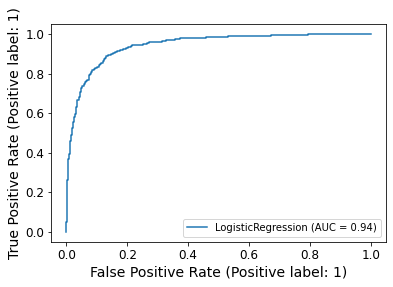

In [ ]:
plot_roc_curve(model, X_test, y_test)
print(classification_report(y_test,y_predicted))

In [ ]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

NameError: name 'rf' is not defined

In [ ]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate)
roc_auc

0.8741280160905377

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1910402144772118
Mean Squared Error: 0.09061528150134049
Root Mean Squared Error: 0.30102372248934217


In [ ]:
x = readAlabamaData.iloc[:, 205:].values
print('x=', x)
y = readAlabamaData['StayAL'].values
print('\ny = ', y)

x= [[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]]

y =  [0 1 1 ... 1 0 1]


In [ ]:
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# regressor.fit(x, y)

In [ ]:
# Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))

# Model Validation

# 